## Introduction to the course ##

Behind many systems there is an intricate wiring diagram, a **network**, that defines the interactions between the components of the system.

In this course, we will learn how to model, understand, explain and, possibly, predict characteristics of these systems by modelling, understanding, explaining and, possibly, predicting the networks **behind** them.

We will cover several aspects of network theory:
- Network representation
- Measures and metrics
- Algorithms
- Properties of real-world networks
- Graph models
- Community structure

We will make use of Python and, in particular, of the Python interface to the **igraph** library.

The reference book is Mark Newman's "**Networks** (2nd Edition)", Oxford University Press.



## Introduction to the course ##

We will take a **practical** perspective:
- you will be given access to a few **datasets**
- through examples and exercises, you will learn how to:
    - extract a network **representation** for a dataset
    - **analyze** the obtained graph to gain valuable knowledge about the system that the data describe
    
At the end of the course you will be asked to choose a dataset and to present an essay where you present a network-based analysis of the dataset.


## What are networks ##

A **network** or a **graph** is a collection of discrete entities and the set of interactions among them.

- we call the entities **vertices** or **nodes**
- we call the interactions **edges** or **links**

Any system that we can describe as being composed of identifiable nodes and definable links can be modeled and analyzed as a network.

Modeling a system as a network means answering two questions:

> What is a vertex?

The answer defines the set V of discrete entities or objects, among which edges exist.

> What is an edge?

The answer defines the set E of pairwise interactions2 among the vertices, i.e., E ⊆ V × V .

## What are networks ##

For any particular system, there may be **multiple ways** of answering these questions.
- in a social network in which vertices are people, edges may represent different kinds of social interaction: friendship, meeting in person, appearing together in a photograph, answering one-another on a social media platform, etc.
- in a biological network in which nodes are genes, an edge might represent a regulatory interaction, a binding affinity between the corresponding proteins, a similarity in terms of evolutionary history, etc.

How we answer the two fundamental questions can greatly shape the kind of questions we will be able to answer later about the underlying system.

<img src="images/table_of_networks.png" alt="A tabel of networks examples" title="A table of possible networks" style="width: 600px;"/>

### Networks are models ###

Remember: a network is a *representation* or a *description* of an underlying system. 

A network can be a fairly good description of a system of roads, but it is probably a poor representation of the stars in a galaxy, and it captures only some aspects of friendships among people.

Keep this fundamental point in mind: **networks are models**

### Network domains ###
In the table above, each network is tagged by one of six scientific domains.
This is a rough taxonomy of the kind of underlying system the network models:

 - **Biological networks** include networks of molecules, genes, cells, tissues, and entire 
species, and are studied across nearly all life-science fields, e.g., molecular biology, microbiology, developmental biology, physiology, neuroscience, ecology, and evolutionary biology.

 - **Social networks** include all different kinds of social interactions among people or organizations, except for those that are explicitly economic in nature. Networks of economic interactions, e.g., economic transactions, preferences, and relationships, get their own economic networks category.

### Network domains ###
In the table above, each network is tagged by one of six scientific domains.
This is a rough taxonomy of the kind of underlying system the network models:

 - **Information networks** include both web graphs, software graphs, and document networks, all of which are defined by citation-like interactions, as well as semantic networks, where edges denote abstract or ontological relationships. This category also includes networks based on pairwise similarity or relatedness scores that do not obviously fall into some other category.

 - **Technological networks** capture systems fundamentally grounded in technology, and especially computer technology, such as the Internet or various other kinds of electronic communication networks.

 - **Transportation networks** describe systems of physical transportation, such as roads, railroads, airplanes, ships, etc., but they can also represent animal transportation systems, e.g., ant trails.

## Graph properties of networks ##

Generally speaking, a network is a set of nodes endowed with pairwise interactions.
Through a set of *graph properties*, we may define the specific aspects of the underlying system that the network captures.

Formally, we define a graph or network as $G = (V, E)$, where $V$ is the set of *vertices*, and $E$ is the set of *edges*.
Each edge is a *pair* of nodes $i,j\in V$ such that $(i,j)\in E$.

### Simple graphs ###
The most basic kind of network is called a **simple graph**, which has the following properties:
1. edges are *undirected*: a connection $(i,j)\in E$ implies a connection $(j, i) \in E$
2. edges are *unweighted*: edges are either present or absent (a **binary** relation)
3. there are *no self-loops*: no edge connects a vertex to itself $(i, i) \notin E$
4. there are *no annotations* on the nodes, except that nodes are uniquely indexed

<img src="images/simple_nonsimple_graphs.png" alt="A comparison of simple and non-simple graphs" title="A comparison of simple and non-simple graphs" style="width: 500px;"/>

### Non-simple graphs ###
When we relax any of the properties that define simple graphs, we get a richer network representation of the underlying system (but, generally, more *difficult to anayze*!)

We may list common graph properties, arranged by whether the property is a function of an edge, a node, or the whole network.

| Edge properties | Node properties | Network properties |
| :- | :- | :- |
| unweighted or weighted (or signed) | attributes |  sparse or dense |
| undirected or directed | coordinates | sparse or dense |
| multigraph | state variables | bipartite or projection |
| timestamps |   | connected or disconnected | 
|   |   | acyclic |
|   |   | temporal |
|   |   | multiplex |
|   |   | hypergraph |

### Networks with edge attributes ###

In **weighted** networks, each edge $(i, j)$ has an associated scalar value or *edge weight* $w_{ij}$, which
might represent:
- the *frequency* of interaction ($w_{ij} \in \mathbb{Z}$)
- the interaction's *strength* ($w_{ij} \in \mathbb{R}$)
- the interaction's *type* ($w_{ij} \in \{−1, +1\}$), e.g., trust/distrust in a social system --> in this case the networks is **signed**

How would you define weights for the networks in the figure?

<img src="images/italy_airports_roads.png" alt="Airport and road network Italy" title="Airport and road network Italy" style="width: 450px;"/>

### Networks with edge attributes ###

Edges annotations can be arbitrarily complicated, e.g., a vector of continuous or categorical (e.g., tags or colors) attributes.
A typical example is a **time** attribute:
- when an edge attribute denotes a discrete *point* in time $t \in \mathbb{N}$ at which that edge exists, we say the network is a **temporal** network, and each group of co-occurring edges (same $t$) is a network "snapshot"
- when edges are annotated by a *starting and stopping* time, as in a network of phone calls or a network of physical proximities, then edges have a continuous *duration*, and we instead say the network has **timestamps**.

<img src="images/temporal2.png" alt="A comparison of static and temporal networks" title="A comparison of static and temporal networks" style="width: 350px;"/>

### Networks with edge attributes ###

A **multigraph** relaxes the prohibition against *repeated* connections (and generally also against *self-loops*), meaning that there exists a **multiplicity** of edges $(i, j) \in E$.
For instance, in a network of neuron cells, two neurons can have multiple synapses and we might wish to represent each such connection as a distinct edge.

How would you define a multigraph from the network in the figure?

<img src="images/italy_airports_roads.png" alt="Airport and road network Italy" title="Airport and road network Italy" style="width: 450px;"/>

### Networks with node attributes ###

Nodes can also have **attributes** or **metadata** attached to them, denoted as $x_i$:
- *categorical* variables (sometimes called “labels”)
- single scalars or vectors representing *state* variables
- spatial *coordinates* or locations in some metric space

For example:
- if nodes are cities, node attributes might include the city's population and GPS coordinates
- in a social network, node metadata may include age, sex, and location
- in a protein-interaction network, node attributes might include the molecular weight or Gene Ontology functional labels

### Directed networks ###

If edges can be *asymmetric*, we call them **directed**, meaning that the edge $(i, j)$ can occur independently of $(j, i)$.
The World Wide Web is a familiar directed network: webpages are nodes, and hyperlinks are the directed edges.
Many biological networks are directed, including gene regulation and neural activation.

<img src="images/directed_network.png" alt="A comparison of directed and undirected graphs" title="A comparison of directed and undirected graphs" style="width: 350px;"/>

### Paths ###

A **path** from vertex $i_s\in V$ to vertex $i_e\in V$ is an ordered sequence of vertices $i_s=i_0,\ldots,i_k=i_e \in V$ such that $(i_h,i_{h+1})\in E$ for all $h=0,\ldots,k-1$.
The number of edges in the path, $k$ in the example, is the *length* of the path. We will often use the notation $i → \cdots → j$ to denote a path from $i$ to $j$.
A **cycle** is a path such that $i_s=i_e$.
A network is **acyclic** if it contains no cycles. 

### Acyclic directed networks ###

A directed network is acyclic if, for every possible $i, j \in V$, if there exists a path $i → \cdots → j$, then no path exists in the reverse direction $j → \cdots → i$.

For instance, a *citation network* is composed of the set of published scientific papers, and an edge $(i, j) \in E$ if paper $i$ cites paper $j$ in its bibliography.
Citation networks are (in theory) directed acyclic graphs because of time: if $(i,j)\in E$, i.e., if $i$ cites $j$, then $i$ is newer then $j$ and, therefore, $j$ cannot cite $i$; for the sema reason, a cycle cannot exist (in practice, preprints sometimes permit cycles in citation networks).

### Neighbors, neighborhoods, degree ##

- A vertex $j\in V$ is a **neighbor** of $i\in V$ if $(i,j)\in E$ or $(j,i)\in E$
- In directed graphs, we distinguish **in-neighbors** and **out-neighbors** 
- The (in-,out-)**neighborhood** of $i$ is the set of its (in-,out-)neighbors
- The **degree** of $i$ is the number of vertices in $i$'s neighborhood
- In directed graphs, we distinguish $i$'s **in-degree** and **out-degree**

### Subgraphs ###

- $G_1=(V_1,E_1)$ is a **subgraph** of another graph $G=(V,E)$ if $V_1\subset V$ and $E_1\subset E$
- Given $G=(V,E)$ and $V_1\subset V$, the subgraph of $G$ **induced** by $V_1$ is the graph $G_1=(V_1,E_1)$ such that $E_1=\{(i,j)\in E \text{ such that } i,j\in V_1\}$
- Given $G=(V,E)$ and $E_1\subset E$, the subgraph of $G$ **induced** by $E_1$ is the graph $G_1=(V_1,E_1)$ such that $V_1=\{i\in V \text{ such that there exist } j \text{ such that } (i,j)\in E_1 \text{ or } (j,i)\in E_1\}$

### Complete graphs and cliques ###

- A graph $G=(V,E)$ is **complete** if it contains all possible edges, i.e., if $E=\{(i,j) \text{ for all } i,j\in V\}$
- A complete subgraph is called a **clique**

### Bipartite networks and one-mode projections ###

**Bipartite** networks are networks where the set of vertices V is composed of 2 distinct classes of nodes and only nodes of different classes interact.
Formally:  $V = V_1 \cup V_2$ with $V_1\cap V_2=\emptyset$, and, for all $(i,j)\in E$, $i\in V_1$ if and only if $j\in V_2$.

A popular type of bipartite graph is the actor-film network, in which actors and films represent the two classes, and actors connect to the films in which they play a part.

Often, a bipartite graph is the *natural* way to represent a system, but we are interested in the relations between the elements of one of the two classes.
In this case, we operate a conversion called a **one-mode projection**: we connect any two vertices on one side of the bipartite network if their neighborhoods are "sufficiently similar" (e.g., if they share at least one neighbor).

<img src="images/bipartite_graph.png" alt="A bipartite graph and its projections" title="A bipartite graph and its projections" style="width: 400px;"/>

### Bipartite networks and one-mode projections ###

For instance:
- the actor-collaboration network is the projection on the actor side of the actor-film network
- the twitter retweet network is the projection on the user side of the user-tweet network in which a (directed) link $(u,t)$ means that $u$ authored $t$ and a link $(t,u)$ means that $u$ retweeted $t$

Projections can also be *weighted*: $(i, j)$ in the projection may be given a weight $w_ij$ that corresponds to its multiplicity as a result of the projection procedure

Remarks:
1. the one-mode projection may produces **cliques**: if we connect all nodes of $V_1$ with a common neighbor in $V_2$, for all $j\in V_2$ the neighborhood of $j$ will be a clique in the projection
2. the same one-mode projection may result from multiple different bipartite networks: the projection operation is surjective but not bijective (can you prove it?)

### Connected networks and components ###

A simple network is **connected** if for every pair of nodes $i, j \in V$, $j$ is *reachable* from $i$, i.e., there exists a path $i → \cdots → j$ ("for every" means that a path exists in *both directions*).
Otherwise, the network is **disconnected**.
The minimum number of edges for a network with $|V|=n$ is $m = n − 1$ (can you prove it?).
A the subgraph induced by a connected subset $T\subset V$ is called a **connected component**.

<img src="images/components.png" alt="The connected components of a graph" title="The connected components of a graph" style="width: 500px;"/>

In a directed network, a subset $T\subset V$ induces a
- **strongly connected component** if, for all $i,j \in T$, $i$ is reachable from $j$ *and* $j$ is reachable from $i$
- **weakly connected component** if, for all $i,j \in T$, *either* $i$ is reachable from $j$ *or* $j$ is reachable from $i$

### Temporal, dynamic and evolving networks ###

Often, graphs do *change over time*:
- in citation networks, new vertices join the network continuously with new edges representing citations to older papers
- in online social networks, friendship edges are added or removed even when the vertex set is static

A network that varies over time is denoted **temporal** or **dynamic** or **evolving**.

- the term **temporal** is used when time is **discrete** and the network can be represented as a *sequence* of static networks ("snapshots") -- each snapshot may describe what happens *at time* $t$ or what happens *between* $t$ and $t+1$
- the term **time-stamped** is used when time is **continuous** and the edges are annotated with an interval, e.g., $(i, j, t_1, t_2)$

<img src="images/temporal.png" alt="A temporal network" title="A temporal network" style="width: 600px;"/>

### Multiplex networks, spatial networks, and hypergraphs ###

A network composed of multiple "layers" of edges is called a **multiplex** or **multilayer** network.
Each layer corresponds to a different *type* of relation/interaction, e.g., followers/followees, retweets and mentions in Twitter. 

<img src="images/multilayer.png" alt="A multilayer network" title="A multilayer network" style="width: 300px;"/>

### Spatial networks ###

In a **spatial** network each vertex is annotated with its **location** in some $d$-dimensional space.
For instance:
- transportation networks, e.g., road, city, airport networks
- oil and gas distribution networks
- online social networks (especially if *location-based*, e.g., Foursquare or Yelp)

In some cases, the location has an impact on the probability that a link exists.

### Hypergraphs ### 

In **hypergraphs** edges denote *higher-order* interactions that involve more than two
vertices, e.g, $E \subset V\times V\times V$.
For instance, we may represent as hypergraphs:
- scientific collaboration graphs 
- co-location graphs

## Network analysis and modeling ##

Based on the scope and goal, the study of a system may be classified as

1. **Exploratory**: a descriptive analysis aimed at producing a clear view of the kinds of statistical patterns that exist in a network 
2. **Explanatory**: an analysis that seeks to "explain" some observed pattern as being driven by some other, hopefully more fundamental variable
3. **Predictive**: a type of modeling that aims to construct a predictive model of either node attributes (including future state variables) or structural features, using other network information as the input 
4. **Causal**: a modeling effort whose goal is the identification of cause-and-effect relations that involve networks

## Network analysis and modeling ##

Example: news diffusion in social networks
- exploratory: identify the paths that a specific news piece followed on a social network
- explanatory: show that such paths are long when they start at a "central" vertex, short otherwise
- predictive: given a news piece and a starting vertex, predict the length of the diffusion path
- causal: show that sharing a news piece is indeed driven by influence from friends' behavior; when a path starts from a central vertex, it is just more likely that some of your friends will share that news piece

### Exploratory analysis ###

- largely **unsupervised** 
- based on **statistical summaries** of the network's structure
    - degree distribution
    - community structure
    - node-level measures of centrality
- often the starting point with a new dataset: what patterns are **worth explaining**?
- successful if it results in one or more **hypotheses** about potential causal effects or underlying mechanisms that relate to a network's structure
- cannot test those hypotheses, but it can use **null models** to decide if some pattern is interesting: is the pattern distinguishable from "noise"?
- requires **creativity**, mathematical **intuition**, **algorithmic** tools and **statistical** rigor

### Exploratory analysis ###

Many exploratory network analysis tasks can be reduced to estimating a **low-dimensional** form for the probability $p_{ij}$ that an edge $(i, j)$ exists, i.e., a form that depends on a limited number of variables.
This means that the network is *simple*, its features are easier to *predict* (and to exploit).

For instance, consider a pair of individuals $i$ and $j$ on Facebook.
- $i$ and $j$ are described by *observable* attributes (shared on Facebook) and *latent* attributed (not shared)
- there are latent attributes of the *pair* (are them family? do they work together?)
- the existence of the edge $(i,j)$ may depend on all of these attributes and more (e.g., actions of other users on Facebook)

What if $p_{ij}$ mostly depended on $i$ and $j$'s age and sex?

### Explanatory analysis ###

- often takes the form of explaining how some attribute of a node **correlates** with the network structural patterns that surround that node
- often based on converting the network itself into additional node-level features and then carry out traditional explanatory modeling
- beware: the network characteristics of a node may be **mutually dependent** 

Example:
- what is the relation between a node's wealth, central position in the network and influence on other nodes?
- we may measure the centrality, measure the influence (how?) and test for correlation of the three attributes
- if network influence and network centrality are *always* correlated, which one is *truly* related to wealth?

### Predictive analysis ###

Often uses machine learning: classification, regression, Bayesian models, etc.

Example: **recommendation** algorithms (e.g., on Netflix or Amazon) are **link prediction** algorithms
- bipartite user-product network
- node attributes describe users and products
- can we predict which links are *missing*?
- if we just consider users (or project onto the user side), we get Facebook's "People You May Know", Instagram's "Suggestions for you", or Twitter's "Who to follow"

### Causal analysis ###

- statisticians and machine learners favor **causal inference** models that can be applied to an observed network and its dynamics
    - may be complex to disentangle different "paths" of influence, but do not require controlled experiments
- biologists and some social scientists often favor **network experiments**, e.g., inducing some change in the network and then observing the subsequent effects
    - may be impossible or very expensive, because it requires access to the (entire) network
- mathematicians and physicists tend to favor **mathematical models**: embed causality in the model (e.g., a stochastic process), and compare the predictions of the model with empirical data
    - in general, you may verify that a model is *sufficient* to explain a phenomenon, not that it is *necessary* (are there alternative explanations?)
    
Causal modeling is often **hypothesis driven**: we already have in mind some notion of why and how an effect of interest comes about.

## A brief introduction to python-igraph ##

There are many libraries for network analysis in python.
My favorite is [python-igraph](https://igraph.org/python/)

<img src="images/igraph.png" alt="Igraph logo" title="Igraph logo" style="width: 300px;"/>

 * written in C/C++ with interfaces to Python and R 
 * pros: performance and speed; cons: installation can be a hurdle
 
A tutorial is available [here](https://igraph.org/python/tutorial/latest/tutorial.html).

In [5]:
# import the module
import igraph
# create an empty graph
G = igraph.Graph()
# add 10 vertices
G.add_vertices(10)
# label the vertices with increasing indices from 0 to 9
G.vs['label'] = range(10)
# add a few edges
G.add_edges([(0,1),(0,2),(0,4),(1,2),(1,3),(2,4),(3,4),(3,5),(4,5),(6,7),(6,8),(6,9),(8,9)])

In [6]:
# set a visual style for the plot
visual_style = {"bbox":(300,300), "margin":20}
# plot G
igraph.plot(G, **visual_style)

AttributeError: plotting not available

In [ ]:
# show a summary of G's characteristics
print(G.summary())
print('''
in the above summary:
- U stands for "undirected", alternative is D for "directed"
- the second letter is N if the graph has a vertex attribute called name, or a dash otherwise
- the third letter is W if the graph is weighted, or a dash otherwise
- the fourth letter is B if the graph has a vertex attribute called type (B stands for "bipartite"), or a dash otherwise
- the two numbers are the number of vertices and the number of edges
''')

In [19]:
# the number of vertices and edges can be directly obtained like this:
print('number of vertices in G:', G.vcount())
print('number of edges in G:', G.ecount())

# list of vertex and edge attributed (if any):
print('G has the following vertex attributes:', G.vertex_attributes())
print('G has the following edge attributes:', G.edge_attributes())

IGRAPH U--- 10 12 -- 
+ attr: label (v)

In the above summary:
- U stands for "undirected", alternative is D for "directed"
- The second letter is N if the graph has a vertex attribute called name, or a dash otherwise
- The third letter is W if the graph is weighted, or a dash otherwise
- The fourth letter is B if the graph has a vertex attribute called type (B stands for "bipartite"), or a dash otherwise
- The two numbers are the number of vertices and the number of edges

Number of vertices in G: 10
Number of edges in G: 12
G has the following vertex attributes: ['label']
G has the following edge attributes: []


is G graph connected? False
this is one of the components:


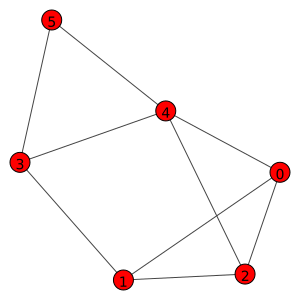

In [46]:
# check if the graph is connected
print('is G graph connected?', G.is_connected())

# extract the G's connected components
components = G.components()
# get each component as a subgraph
H,K = components.subgraphs()
# plot the first component
print('this is one of the components:')
igraph.plot(H, **visual_style)

L is a clique, that is, a complete subgraph


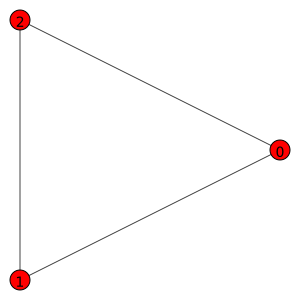

In [26]:
# extract the subgraph induced by the first 3 vertices
L = G.subgraph([0,1,2])
print('L is a clique, that is, a complete subgraph')
# plot L
igraph.plot(L, **visual_style)

In [37]:
# a graph is stored in igraph as a vertex sequence (G.vs) and an edge sequence (G.es)
# let's see the first element of both sequences:
for vertex in G.vs:
    print('each vertex is an object:', vertex)
    print('the vertex has a unique index from 0 to G.vcount()-1, in this case:', vertex.index)
    print('the attributes of this vertex are:', vertex.attributes())
    # break the loop
    break
for edge in G.es:
    print('each edge is an object:', edge)
    print('the edge has a unique index from 0 to G.ecount()-1, in this case:', edge.index)
    print('the attributes of this edge are:', edge.attributes())
    print('this edge connects the following vertices:', edge.tuple)
    # break the loop
    break

each vertex is an object: igraph.Vertex(<igraph.Graph object at 0x7fbd5d2e4040>, 0, {'label': 0})
the vertex has a unique index from 0 to G.vcount()-1, in this case: 0
the attributes of this vertex are: {'label': 0}
each edge is an object: igraph.Edge(<igraph.Graph object at 0x7fbd5d2e4040>, 0, {})
the edge has a unique index from 0 to G.ecount()-1, in this case: 0
the attributes of this edge are: {}
this edge connects the following vertices: (0, 1)


In [44]:
# we can get the degree of all vertices of G
print('the degree sequence of G is', G.degree())

# for a given vertex, we can get its neighborhood
print('vertex 2 has the following neighbors:')
for u in G.vs[2].neighbors():
    print(u)
# and the list of its incident edges
print('the edges incident to vertex 3 are the following:')
for e in G.vs[3].all_edges():
    print(e, e.tuple)
# and all simple (i.e., acyclic) paths starting from that vertex
print('these are all the paths that start from vertex 6')
print(G.get_all_simple_paths(6))

the degree sequence of G is [3, 3, 3, 3, 4, 2, 3, 1, 2, 2]
vertex 2 has the following neighbors:
igraph.Vertex(<igraph.Graph object at 0x7fbd5d2e4040>, 0, {'label': 0})
igraph.Vertex(<igraph.Graph object at 0x7fbd5d2e4040>, 1, {'label': 1})
igraph.Vertex(<igraph.Graph object at 0x7fbd5d2e4040>, 4, {'label': 4})
the edges incident to vertex 3 are the following:
igraph.Edge(<igraph.Graph object at 0x7fbd5d2e4040>, 4, {}) (1, 3)
igraph.Edge(<igraph.Graph object at 0x7fbd5d2e4040>, 6, {}) (3, 4)
igraph.Edge(<igraph.Graph object at 0x7fbd5d2e4040>, 7, {}) (3, 5)
these are all the paths that start from vertex 6
[[6, 7], [6, 8], [6, 8, 9], [6, 9], [6, 9, 8]]
